# Rent the Runway Code

### Imports

In [352]:
import pandas as pd
import numpy as np
import json
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

In [353]:
# Read in the json file
df = pd.read_json('data/renttherunway_final_data.json', lines=True)

def unpack(x):
    rv = []
    for v in x:
        if isinstance(v, dict):
            rv.append([*v.values()][0])
        else:
            rv.append(v)
    return rv

df = df.apply(unpack)
df.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192544 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192544 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


In [113]:
# df.describe()

### Time Frame: 
**November 3, 2010 to January 8, 2018**

In [314]:
df['review date'] = pd.to_datetime(df['review_date'], format='%B %d, %Y')
df['review date']

0        2016-04-20
1        2013-06-18
2        2015-12-14
3        2014-02-12
4        2016-09-26
            ...    
192539   2016-05-18
192540   2016-09-30
192541   2016-03-04
192542   2015-11-25
192543   2017-08-29
Name: review date, Length: 192544, dtype: datetime64[ns]

In [315]:
from_date = df['review date'].min()
from_date

Timestamp('2010-11-03 00:00:00')

In [316]:
to_date = df['review date'].max()
to_date

Timestamp('2018-01-08 00:00:00')

### Ratings Overall

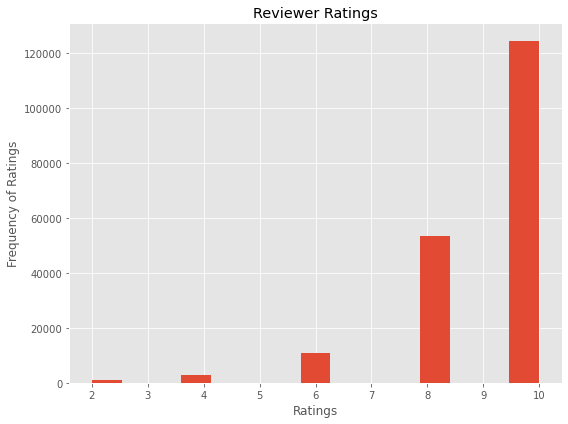

In [317]:
fig, ax = plt.subplots(figsize=(8,6))
plt.style.use('ggplot')
plt.hist(x=df['rating'], bins=15)
ax.set_title('Reviewer Ratings')
ax.set_xlabel('Ratings')
ax.set_ylabel('Frequency of Ratings')
plt.tight_layout()

In [318]:
df['rating'].value_counts(dropna=False)
# [82, 1046, 2791, 10697, 53391, 124537]

10.0    124537
8.0      53391
6.0      10697
4.0       2791
2.0       1046
NaN         82
Name: rating, dtype: int64

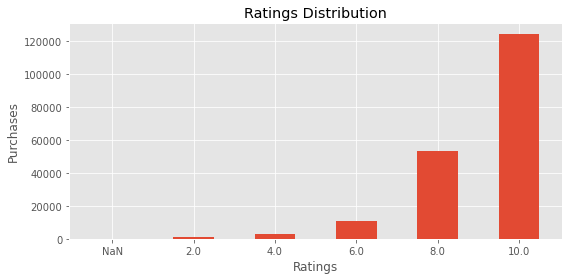

In [413]:
fig, ax = plt.subplots(figsize=(8,4))
plt.style.use('ggplot')
plt.bar(['NaN', '2.0', '4.0', '6.0', '8.0', '10.0'], [82, 1046, 2791, 10697, 53391, 124537], width=0.5)
ax.set_title('Ratings Distribution')
ax.set_xlabel('Ratings')
ax.set_ylabel('Purchases')
plt.tight_layout()

### Average Rating by Fit

In [320]:
#why doesn't this work? freezes jupyternotebook

# fig, ax = plt.subplots()
# plt.bar(df['fit'], df['rating'])

# you're not graphing numbers in y axis -- see below

In [321]:
fit_categories = df.groupby(['fit'])
names = []
avg_ratings = []
for category_name,category_df in fit_categories:
#     print(category_name)
#     print(category_df.head())
    avg_ratings.append(category_df['rating'].mean())
    names.append(category_name)
  

In [322]:
names
avg_ratings = np.round(avg_ratings, 2)
avg_ratings

array([9.31, 8.55, 8.42])

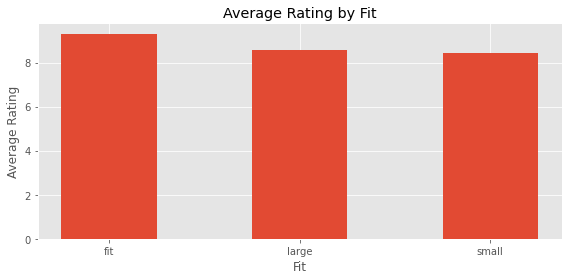

In [323]:
fig, ax = plt.subplots(figsize=(8,4))
plt.style.use('ggplot')
plt.bar(x=names, height=avg_ratings, width=0.5)
ax.set_title('Average Rating by Fit')
ax.set_xlabel('Fit')
ax.set_ylabel('Average Rating')
plt.tight_layout()

### Size

In [324]:
# size count
size_categories = df.groupby(['size'])
sizes = []
amounts_by_size = []
for category_name,category_df in size_categories:
    sizes.append(category_name)
    amounts_by_size.append(category_df['size'].count())

In [391]:
# sizes
# amounts_by_size
df['size'].mean()

12.245175128801728

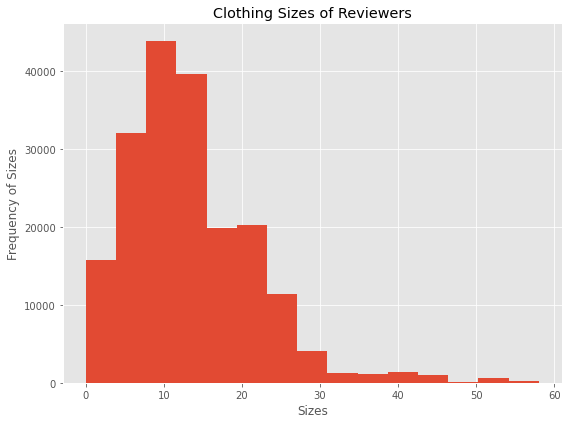

In [404]:
fig, ax = plt.subplots(figsize=(8,6))
plt.style.use('ggplot')
plt.hist(x=df['size'], bins=15)
ax.set_title('Clothing Sizes of Reviewers')
ax.set_xlabel('Sizes')
ax.set_ylabel('Frequency of Sizes')
plt.tight_layout()
#shoppers tend to hang around sizes 8 - 12. RTR generally has clothing up to size 22 
#so values beyond that could be user error or different clothing attributes.

### Top Repeat Customers

In [433]:
#frequency of reviews
df['review count'] = df.groupby('user_id')['user_id'].transform('count')
df['review count'].head()

0    6
1    1
2    1
3    1
4    7
Name: review count, dtype: int64

In [328]:
top_repeat_customers = df['user_id'].value_counts().head(10)
top_repeat_customers


691468    436
32925     292
362951    228
45337     140
833675    128
742630    124
269712    105
616450     98
215971     96
257847     87
Name: user_id, dtype: int64

### Loyal Customers

In [329]:
repeat_customers = df['user_id'].value_counts()
loyal_customer_count = 0
loyal_customers = 0
for count in repeat_customers:
    if count >= 2:
        loyal_customers += 1
        loyal_customer_count += count
loyal_customers, loyal_customer_count

(33747, 120720)

### Unique Customers

In [427]:
repeat_customers = df['user_id'].value_counts()
unique_customers = 0
for count in repeat_customers:
    if count == 1:
        unique_customers += count
unique_customers
# repeat_customers

71824

## Hypothesis Testing
    H0: There is no difference in the average ratings of Loyal or Unique shoppers

    HA: There is a difference in the average ratings of Loyal and Unique shoppers

**Loyal Customer Ratings**

In [437]:
loyal_customer_ratings = df[df['review count'] >= 2]['rating']
lc_ratings = np.array(loyal_customer_ratings)
lc_ratings
# np.isnan(lc_ratings).sum()

array([10., 10., 10., ..., 10., 10.,  6.])

**Unique Customer Ratings**

In [438]:
unique_customers_ratings = df[df['review count'] == 1]['rating']
uc_ratings = np.array(unique_customers_ratings)
uc_ratings
# np.isnan(uc_ratings).sum()

array([10., 10.,  8., ...,  8., 10., 10.])

**t-test**

The distribution is not normal, but for demonstrative purposes we will apply a t-test.

In [333]:
lc_mean = np.nanmean(lc_ratings) 
lc_mean


9.028251864125933

In [334]:
uc_mean = np.nanmean(uc_ratings)
uc_mean

9.200217385245674

In [440]:
def t_test_statistic(sample_1, sample_2):
    numerator = np.nanmean(sample_1) - np.nanmean(sample_2)
    denominator_sq = (np.nanvar(sample_1) / len(sample_1)) + (np.nanvar(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [449]:
print("Loyal customer's standard dev: {:2.2f}".format(np.nanstd(lc_ratings)))
print("Unique customer's standard dev: {:2.2f}".format(np.nanstd(uc_ratings)))

Loyal customer's standard dev: 1.47
Unique customer's standard dev: 1.35


In [441]:
test_statistic = t_test_statistic(lc_ratings, uc_ratings)
print("Student Test Statistic: {:2.2f}".format(test_statistic))

Student Test Statistic: -26.16


In [442]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(lc_ratings)
    ss2 = len(uc_ratings)
    df = (
        ((np.nanvar(lc_ratings)/ss1 + np.nanvar(uc_ratings)/ss2)**(2.0)) / 
        ((np.nanvar(lc_ratings)/ss1)**(2.0)/(ss1 - 1) + (np.nanvar(uc_ratings)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [443]:
df = welch_satterhwaithe_df(lc_ratings, uc_ratings)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))

Degrees of Freedom for Welch's Test: 161888.01


alpha = 0.05

In [444]:
students = stats.t(df)
p_value = students.cdf(test_statistic) + (1 - students.cdf(-test_statistic))
print("p-value for different average ratings: {:2.4f}".format(p_value))

p-value for different average ratings: 0.0000


### Mann-Whitney U Statistic

In [431]:
res = stats.mannwhitneyu(lc_ratings, uc_ratings)
print(res)
print("p-value for loyals = uniques: {:2.3f}".format(res.pvalue))

MannwhitneyuResult(statistic=4085574527.5, pvalue=5.068767453767668e-140)
p-value for loyals = uniques: 0.000


### Clothing Types
**Top Categories**

In [392]:
top_10_categories = df['category'].value_counts().head(10)
top_10_categories

dress       92884
gown        44381
sheath      19316
shift        5365
jumpsuit     5184
top          4931
maxi         3443
romper       3070
jacket       2404
mini         1751
Name: category, dtype: int64

In [342]:
category_count = []
for categories in top_10_categories:
    category_count.append(categories)

category_count
# trying to get array of category names for x val :(

[92884, 44381, 19316, 5365, 5184, 4931, 3443, 3070, 2404, 1751]

**Occasions**

In [355]:
top_occasions = df['rented for'].value_counts()
top_occasions

wedding            57784
formal affair      40408
party              35626
everyday           16822
other              15388
work               15042
date                7388
vacation            4075
party: cocktail        1
Name: rented for, dtype: int64

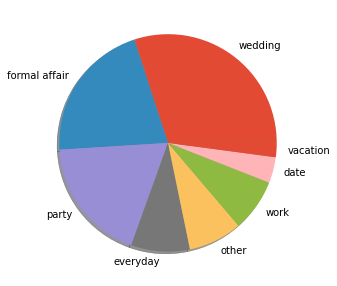

In [411]:
bought_occasion = np.array([57784, 40408, 35626, 16822, 15388, 15042, 7388, 4075])
reason = ['wedding', 'formal affair', 'party', 'everyday', 'other', 'work', 'date', 'vacation']
fig, ax = plt.subplots(figsize=(6, 5))
plt.pie(bought_occasion, labels = reason, shadow = True);

In [344]:
# group by bin and occasion then bin and age
# occasion_categories = df.groupby(['rented for'])

# for category_name,category_df in occasion_categories:
#     print(category_name)
#     print(category_df.head())

In [345]:
# group by bin
# age_categories = df.groupby(['bin'])

# for category_name,category_df in age_categories:
#     print(category_name)
#     print(category_df.head())

In [387]:
#group by both
age_occasion_categories = df.groupby(['bin', 'rented for'])

age_group = [] #bin - category_name[0]
occasion_by_age_count = [] # category_df['rating'].count()
occasion_by_age = [] #rented for - category_name[1]

for category_name,category_df in age_occasion_categories:
#     print(category_name)
#     print(category_df.head())
    age_group.append(category_name[0])
    occasion_by_age_count.append(category_df['bin'].count())
    occasion_by_age.append(category_name[1])
#     if category_name[0] == '0-10':
#         pass
    print(category_name[0], category_name[1], category_df['bin'].count())

0-10 date 1
0-10 everyday 2
0-10 formal affair 13
0-10 other 3
0-10 party 8
0-10 wedding 10
0-10 work 3
10-20 date 32
10-20 everyday 33
10-20 formal affair 1381
10-20 other 244
10-20 party 273
10-20 vacation 4
10-20 wedding 101
10-20 work 14
20-30 date 2332
20-30 everyday 5362
20-30 formal affair 15314
20-30 other 5818
20-30 party 12013
20-30 vacation 1196
20-30 wedding 24227
20-30 work 4018
30-40 date 3702
30-40 everyday 7564
30-40 formal affair 15583
30-40 other 6550
30-40 party 16776
30-40 party: cocktail 1
30-40 vacation 2050
30-40 wedding 27966
30-40 work 7611
40-50 date 1008
40-50 everyday 2789
40-50 formal affair 5552
40-50 other 1905
40-50 party 4737
40-50 vacation 620
40-50 wedding 3330
40-50 work 2540
50-60 date 247
50-60 everyday 855
50-60 formal affair 1903
50-60 other 685
50-60 party 1379
50-60 vacation 152
50-60 wedding 1423
50-60 work 705
60-70 date 40
60-70 everyday 125
60-70 formal affair 358
60-70 other 111
60-70 party 251
60-70 vacation 24
60-70 wedding 399
60-70 wor

In [385]:
#group by both but flipped TEST 
occasion_age_categories = df.groupby(['rented for', 'bin'])

group_age = [] #bin - category_name[0]
age_by_occasion_count = [] # category_df['rating'].count()
age_by_occasion = [] #rented for - category_name[1]

for category_name,category_df in occasion_age_categories:
#     print(category_name)
#     print(category_df.head())
    group_age.append(category_name[0])
    occasion_by_age_count.append(category_df['bin'].count())
    occasion_by_age.append(category_name[1])

In [388]:
# age_group

# occasion_by_age_count
occasion_by_age

# manually enter it

['date',
 'everyday',
 'formal affair',
 'other',
 'party',
 'wedding',
 'work',
 'date',
 'everyday',
 'formal affair',
 'other',
 'party',
 'vacation',
 'wedding',
 'work',
 'date',
 'everyday',
 'formal affair',
 'other',
 'party',
 'vacation',
 'wedding',
 'work',
 'date',
 'everyday',
 'formal affair',
 'other',
 'party',
 'party: cocktail',
 'vacation',
 'wedding',
 'work',
 'date',
 'everyday',
 'formal affair',
 'other',
 'party',
 'vacation',
 'wedding',
 'work',
 'date',
 'everyday',
 'formal affair',
 'other',
 'party',
 'vacation',
 'wedding',
 'work',
 'date',
 'everyday',
 'formal affair',
 'other',
 'party',
 'vacation',
 'wedding',
 'work',
 'everyday',
 'formal affair',
 'other',
 'party',
 'vacation',
 'wedding',
 'work',
 'formal affair',
 'other',
 'wedding',
 'date',
 'everyday',
 'formal affair',
 'other',
 'party',
 'wedding',
 'work',
 'everyday',
 'formal affair',
 'other',
 'party',
 'wedding',
 'work']

In [ ]:
# # occasion_by_age_count
# ['0-10', '10-20','20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100','100-120']
# [1,2,13,3,8,10,3]
#  [32,
#  33,
#  1381,
#  244,
#  273,
#  4,
#  101,
#  14,
#  2332,
#  5362,
#  15304,
#  5817,
#  12007,
#  1195,
#  24226,
#  4018,
#  3701,
#  7564,
#  15565,
#  6545,
#  16769,
#  1,
#  2049,
#  27954,
#  7611,
#  1008,
#  2789,
#  5542,
#  1905,
#  4737,
#  620,
#  3329,
#  2540,
#  247,
#  855,
#  1899,
#  684,
#  1379,
#  152,
#  1421,
#  705,
#  40,
#  125,
#  358,
#  111,
#  251,
#  24,
#  399,
#  59,
#  1,
#  18,
#  6,
#  9,
#  1,
#  17,
#  2,
#  3,
#  1,
#  3,
#  1,
#  9,
#  3,
#  1,
#  3,
#  1,
#  4,
#  3,
#  20,
#  7,
#  20,
#  9,
#  6]

In [ ]:
# fig, ax = plt.subplots(figsize=(8,4))
# plt.style.use('ggplot')
# plt.bar(['0-10', '10-20','20-30', '30-40', '40-50', '50-60', '60-70', '70-80', 
#          '80-90', '90-100','100-120'], df['bin'].value_counts().sort_index())
# ax.set_title('Shoppers by Age')
# ax.set_xlabel('Ages')
# ax.set_ylabel('Purchases')
# plt.tight_layout()

# # set width of bar
# barWidth = 0.25
 
# # set height of bar
# bars1 = [12, 30, 1, 8, 22]
# bars2 = [28, 6, 16, 5, 10]
# bars3 = [29, 3, 24, 25, 17]
 
# # Set position of bar on X axis
# r1 = np.arange(len(bars1))
# r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
# wedding            
# formal affair      
# party              
# everyday           
# other              
# work               
# date                
# vacation

# # Make the plot
# plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
# plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
# plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')


# # Add xticks on the middle of the group bars
# plt.xlabel('group', fontweight='bold')
# plt.xticks([r + barWidth for r in range(len(bars1))], ['0-10', '10-20','20-30', '30-40', '40-50', '50-60', '60-70', '70-80', 
#          '80-90', '90-100','100-120'])
 
# # Create legend & Show graphic
# plt.legend()


In [361]:
# group by bin and occasion then bin and age
age_categories = df.groupby(['rented for'])

age_bins = []
age_bins_count = []

occasions_count = []
# occasions = np.array(top_occasions)
occasions = []
occasion_by_age = []
for category_name,category_df in age_categories:
    occasions_count.append(category_df['bin'].count())
    occasion_by_age.append(category_df['bin'])
    occasions.append(category_name)
    age_bins_count.append(category_df.count())
age_bins
occasions_count
occasion_by_age

[5         40-50
 32        20-30
 61        20-30
 64        20-30
 105       30-40
           ...  
 192491    30-40
 192516    20-30
 192523    30-40
 192524    30-40
 192531    30-40
 Name: bin, Length: 7388, dtype: category
 Categories (11, object): ['0-10' < '10-20' < '20-30' < '30-40' ... '70-80' < '80-90' < '90-100' < '100-120'],
 6         20-30
 38        40-50
 44        40-50
 46        20-30
 49        30-40
           ...  
 192475    30-40
 192485    30-40
 192497    30-40
 192533    30-40
 192541    30-40
 Name: bin, Length: 16822, dtype: category
 Categories (11, object): ['0-10' < '10-20' < '20-30' < '30-40' ... '70-80' < '80-90' < '90-100' < '100-120'],
 3         30-40
 7         60-70
 8         20-30
 9         30-40
 14        30-40
           ...  
 192470    20-30
 192472    30-40
 192490    20-30
 192495    50-60
 192496    30-40
 Name: bin, Length: 40408, dtype: category
 Categories (11, object): ['0-10' < '10-20' < '20-30' < '30-40' ... '70-80' < '80-90' < '

In [176]:
occasions

array([57784, 40408, 35626, 16822, 15388, 15042,  7388,  4075,     1])

In [362]:
#group item_id with category -- then find top purchased items
test = df.groupby(['item_id', 'category']).size().head(15)
test
df.groupby(['item_id', 'category'])

In [122]:
# # df.groupby(['category', 'item_id']).size().head(15)
# item_cat_categories = df.groupby(['category', 'item_id'])
# item_cats = []
# avg_ratings = []
# for category_name,category_df in fit_categories:
# #     print(category_name)
# #     print(category_df.head())
#     avg_ratings.append(category_df['rating'].mean())
#     names.append(category_name)
  

In [162]:
# fig, ax = plt.subplots(figsize=(8,4))
# plt.style.use('ggplot')
# plt.bar([test], test)
# ax.set_title('Shoppers by Age')
# ax.set_xlabel('Ages')
# ax.set_ylabel('Purchases')
# plt.tight_layout()

In [163]:
# df.sort_values(['item_id', 'category'],ascending=False).groupby(['item_id', 'category']).head(2)

In [109]:
# df.groupby(['category', 'item_id']).size()

### Body Type

In [363]:
bt_categories = df.groupby(['body type'])
body_types = []
bt_avg_ratings = []
for category_name,category_df in bt_categories:
    bt_avg_ratings.append(category_df['rating'].mean())
    body_types.append(category_name)

In [89]:
body_types
bt_avg_ratings = np.round(bt_avg_ratings, 2)
bt_avg_ratings

array([8.93, 9.12, 9.02, 9.08, 9.04, 9.08, 9.16])

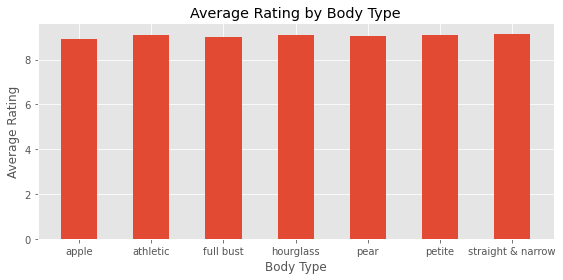

In [90]:
fig, ax = plt.subplots(figsize=(8,4))
plt.style.use('ggplot')
plt.bar(x=body_types, height=bt_avg_ratings, width=0.5)
ax.set_title('Average Rating by Body Type')
ax.set_xlabel('Body Type')
ax.set_ylabel('Average Rating')
plt.tight_layout()

### Cup Sizes

In [138]:
bra_sizes = df['bust size'].value_counts().head(10)
bra_sizes

34b    27285
34c    23139
34d    18029
36c    13516
32d    11196
36d    11122
32b    10911
32c     9943
36b     9676
34a     7891
Name: bust size, dtype: int64

In [137]:
df['cup_size'] = df['bust size'].str.slice(start=2)
df['cup_size'].head(10)

0      d
1      b
2    NaN
3      c
4      b
5      b
6      c
7     d+
8      d
9      b
Name: cup_size, dtype: object

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fit             192544 non-null  object        
 1   user_id         192544 non-null  int64         
 2   bust size       174133 non-null  object        
 3   item_id         192544 non-null  int64         
 4   weight          162562 non-null  object        
 5   rating          192462 non-null  float64       
 6   rented for      192534 non-null  object        
 7   review_text     192544 non-null  object        
 8   body type       177907 non-null  object        
 9   review_summary  192544 non-null  object        
 10  category        192544 non-null  object        
 11  height          191867 non-null  object        
 12  size            192544 non-null  int64         
 13  age             191584 non-null  float64       
 14  review_date     192544 non-null  obj

In [154]:
# cup sizes per reviewer
cup_categories = df.groupby(['cup_size'])
cup_types = []
cup_count = []
for category_name,category_df in cup_categories:
    cup_count.append(category_df['cup_size'].count())
    cup_types.append(category_name)
cup_count

[15286, 710, 49110, 49634, 45008, 3956, 6703, 2602, 458, 440, 156, 40, 30]

In [155]:
cup_types

['a', 'aa', 'b', 'c', 'd', 'd+', 'dd', 'ddd/e', 'f', 'g', 'h', 'i', 'j']

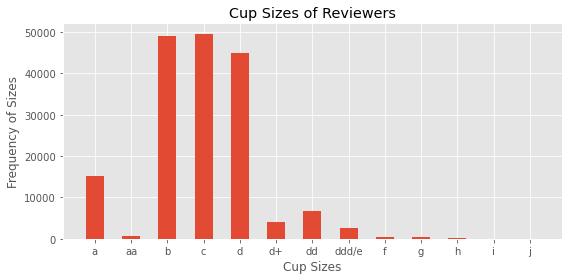

In [156]:
fig, ax = plt.subplots(figsize=(8,4))
plt.style.use('ggplot')
plt.bar(x=cup_types, height=cup_count, width=0.5)
ax.set_title('Cup Sizes of Reviewers')
ax.set_xlabel('Cup Sizes')
ax.set_ylabel('Frequency of Sizes')
plt.tight_layout()

In [141]:
#group by cup sizes now and compare with ratings

cup_categories = df.groupby(['cup_size'])
cup_types = []
cup_avg_ratings = []
for category_name,category_df in cup_categories:
    cup_avg_ratings.append(category_df['rating'].mean())
    cup_types.append(category_name)

In [144]:
cup_types
cup_avg_ratings = np.round(cup_avg_ratings, 2)
cup_avg_ratings

array([9.1 , 9.09, 9.12, 9.1 , 9.05, 8.96, 9.07, 9.14, 9.  , 8.81, 8.91,
       9.2 , 8.4 ])

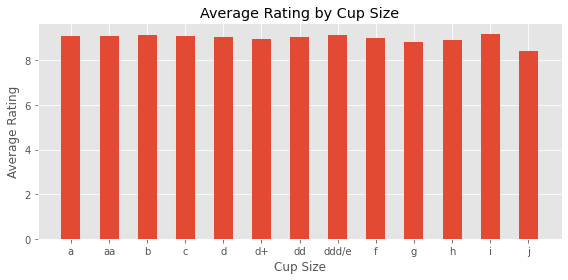

In [145]:
fig, ax = plt.subplots(figsize=(8,4))
plt.style.use('ggplot')
plt.bar(x=cup_types, height=cup_avg_ratings, width=0.5)
ax.set_title('Average Rating by Cup Size')
ax.set_xlabel('Cup Size')
ax.set_ylabel('Average Rating')
plt.tight_layout()

### Age

In [382]:
age_range = df['age'].value_counts().head(10)
age_range

31.0    14522
30.0    14145
29.0    13589
32.0    13508
28.0    11965
33.0    11882
34.0    10143
35.0     9036
27.0     8960
36.0     7710
Name: age, dtype: int64

In [358]:
df['bin'] = pd.cut(df['age'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120], labels=['0-10', '10-20','20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100','100-120'])


In [359]:
df['bin'].value_counts().sort_index()

0-10          40
10-20       2082
20-30      70287
30-40      87805
40-50      22482
50-60       7349
60-70       1367
70-80         54
80-90          7
90-100        22
100-120       65
Name: bin, dtype: int64

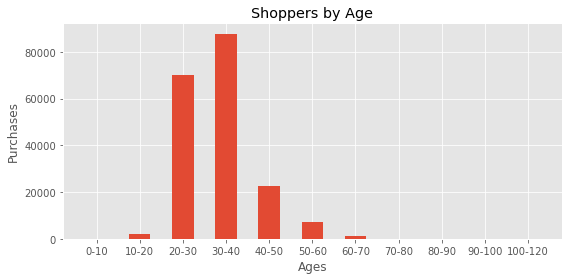

In [383]:
fig, ax = plt.subplots(figsize=(8,4))
plt.style.use('ggplot')
plt.bar(['0-10', '10-20','20-30', '30-40', '40-50', '50-60', '60-70', '70-80', 
         '80-90', '90-100','100-120'], df['bin'].value_counts().sort_index(), width=0.5)
ax.set_title('Shoppers by Age')
ax.set_xlabel('Ages')
ax.set_ylabel('Purchases')
plt.tight_layout()

In [364]:
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

from collections import Counter
# nltk.download('stopwords')

### Common Words in Reviews 

In [372]:
Counter(" ".join(df["review_summary"].str.lower()).split()).most_common(30)

[('and', 47125),
 ('dress', 46548),
 ('a', 44668),
 ('the', 40196),
 ('this', 37539),
 ('i', 36270),
 ('for', 35781),
 ('was', 26469),
 ('great', 20893),
 ('it', 20330),
 ('to', 19159),
 ('perfect', 18447),
 ('dress!', 17874),
 ('so', 15532),
 ('of', 15394),
 ('beautiful', 15136),
 ('loved', 13871),
 ('my', 13763),
 ('in', 12466),
 ('very', 11436),
 ('compliments', 10652),
 ('but', 10443),
 ('wore', 9836),
 ('many', 9037),
 ('on', 8889),
 ('is', 8557),
 ('comfortable', 8531),
 ('fit', 8153),
 ('got', 7719),
 ('fun', 7374)]

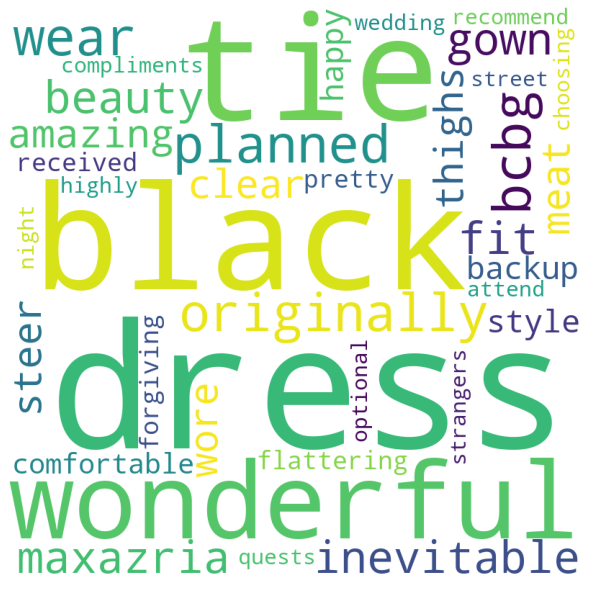

In [373]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in df['review_text']: 
# typecaste each val to string 
   val = str(val) 
   # split the value 
   tokens = val.split() 

# Converts each token into lowercase 
for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower() 

for words in tokens: 
    comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 


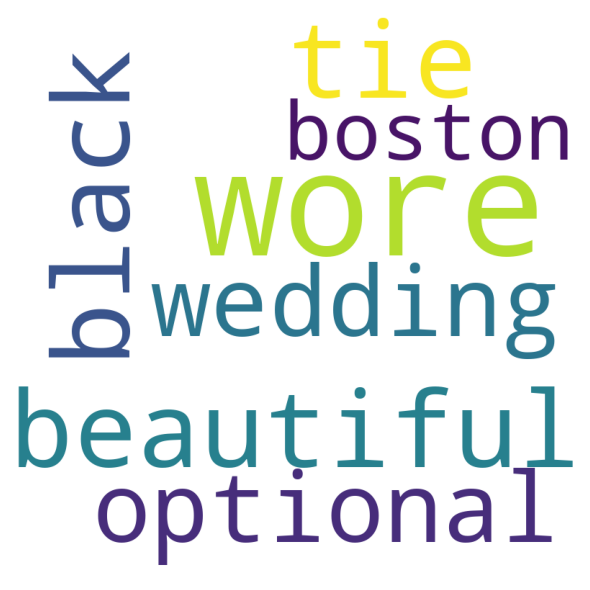

In [371]:
comment_words = ' '
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in df['review_summary']: 
# typecaste each val to string 
   val = str(val) 
   # split the value 
   tokens = val.split() 

# Converts each token into lowercase 
for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower() 

for words in tokens: 
    comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

In [ ]:
#scatter plot category item over time
#scatter plot 

In [ ]:
# plot women who purchased only once and their score

### Height

In [375]:
heights = df['height'].value_counts(dropna=False)
heights

5' 4"     28012
5' 6"     25680
5' 5"     24318
5' 7"     24020
5' 3"     20736
5' 2"     16762
5' 8"     16369
5' 9"     11371
5' 1"      7145
5' 10"     7041
5' 0"      4015
5' 11"     3114
6' 0"      1406
4' 11"     1014
NaN         677
6' 1"       364
4' 10"      212
6' 2"       124
4' 9"        60
6' 3"        31
4' 6"        20
6' 4"        18
4' 8"        17
4' 7"        16
6' 6"         2
Name: height, dtype: int64

In [16]:
# df['height'].unique()

In [378]:
height_categories = df.groupby(['height'])
heights = []
height_count = []
for category_name,category_df in height_categories:
    height_count.append(category_df['height'].count())
    heights.append(category_name)
heights
# height_count

['4\' 10"',
 '4\' 11"',
 '4\' 6"',
 '4\' 7"',
 '4\' 8"',
 '4\' 9"',
 '5\' 0"',
 '5\' 1"',
 '5\' 10"',
 '5\' 11"',
 '5\' 2"',
 '5\' 3"',
 '5\' 4"',
 '5\' 5"',
 '5\' 6"',
 '5\' 7"',
 '5\' 8"',
 '5\' 9"',
 '6\' 0"',
 '6\' 1"',
 '6\' 2"',
 '6\' 3"',
 '6\' 4"',
 '6\' 6"']

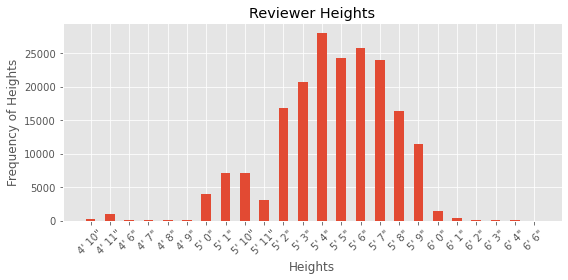

In [426]:
fig, ax = plt.subplots(figsize=(8,4))
plt.style.use('ggplot')
plt.bar(x=heights, height=height_count, width=0.5)
plt.xticks(rotation = 45)
ax.set_title('Reviewer Heights')
ax.set_xlabel('Heights')
ax.set_ylabel('Frequency of Heights')
plt.tight_layout()